<a href="https://colab.research.google.com/github/proteinovayas13/product-star/blob/main/Explain_your_model_predictions_with_Shapley_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a class="anchor" id="0"></a>
# **Explain your model predictions with Shapley Values**


Hello friends,


In this kernel, I will introduce you to **SHAP library** and **Shapley Values** in Python. These are used to explain your model predictions and get insights into the model development process.

So, let's get started.

# **Most commonly used methods for explainability**

- These methods do not rely on any particularity of the model. The advantage of these methods lies in their flexibility. Machine learning developers are free to use any machine learning model they like. The interpretation methods can be applied to any model. These methods are given below:-

 - 1 Shapley values (explained here)
 - 2 LIME
 - 3 Feature importance

# **2. Introduction to SHAP library and Shapely values** <a class="anchor" id="2"></a>



- Python provides a library called [SHAP (SHapley Additive exPlanations)](https://christophm.github.io/interpretable-ml-book/shap.html) by Lundberg and Lee, It is used to explain individual model predictions. SHAP is based on the game theoretically optimal [Shapley Values](https://christophm.github.io/interpretable-ml-book/shapley.html#shapley).

- Let's first talk about Shapley Values.

## **2.1 Shapley Values** <a class="anchor" id="2.1"></a>




- In terms of [Interpretable Machine Learning - Shapley Values](https://christophm.github.io/interpretable-ml-book/shapley.html#shapley), **Shapley Values** can be defined as-

     **A prediction can be explained by assuming that each feature value of the instance is a “player” in a game    where the prediction is the payout. Shapley values – a method from coalitional game theory – tells us how to fairly distribute the “payout” among the features.**


- For an in-depth discussion of Shapley Values, please read the chapter - [Shapley Values](https://christophm.github.io/interpretable-ml-book/shapley.html#shapley).


## **2.2 SHAP Library** <a class="anchor" id="2.2"></a>




- The SHAP library in Python has inbuilt functions to use Shapley values for interpreting machine learning models. It has optimized functions for interpreting tree-based models and a model agnostic explainer function for interpreting any black-box model for which the predictions are known.

- Lundberg and Lee implemented SHAP in the [SHAP](https://github.com/slundberg/shap) Python package. This implementation works for tree-based models in the scikit-learn machine learning library for Python.

- The SHAP authors proposed **KernelSHAP**, an alternative, kernel-based estimation approach for Shapley values inspired by [local surrogate models](https://christophm.github.io/interpretable-ml-book/lime.html#lime).

- Also they proposed **TreeSHAP**, an efficient estimation approach for tree-based models.

- [SHAP](https://github.com/slundberg/shap) comes with many global interpretation methods based on aggregations of Shapley values. We will demonstrate them in this kernel.

- For an in-depth discussion of [SHAP](https://github.com/slundberg/shap) , please read the chapter - [SHAP](https://christophm.github.io/interpretable-ml-book/shap.html).

- Now, let's get to the implementation.

## **3.1 Initial Set-Up** <a class="anchor" id="3.1"></a>


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization+

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **3.2 Reading Data** <a class="anchor" id="3.2"></a>


In [ ]:
# Load and preview data
df = pd.read_csv('housing_new.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

- The target variable is `median_house_value`.

## **3.3 View Summary of data** <a class="anchor" id="3.3"></a>


In [ ]:
# View summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- We can see that `total_bedrooms` have missing values.

## **3.4 Missing Value Treatment** <a class="anchor" id="3.4"></a>

<Axes: xlabel='total_bedrooms'>

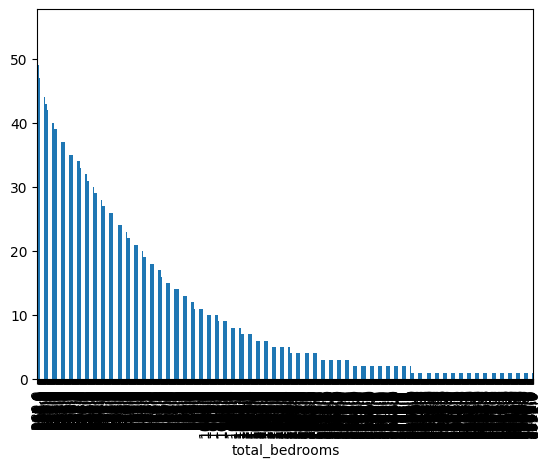

In [ ]:
# Plot the distribution of total bedrooms
df['total_bedrooms'].value_counts().plot.bar()

- The `total_bedrooms` distribution have skewed distribution. So, I will use median to fill the missing values.

In [ ]:
# Imputing missing values in total_bedrooms by median
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

In [ ]:
# now check for missing values in total bedrooms
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


There are no missing values in the dataset.

## **3.5 Feature Vector and Target Variable** <a class="anchor" id="3.5"></a>


In [ ]:
# Declare feature vector and target variable
X = df[['longitude','latitude','housing_median_age','total_rooms',
        'total_bedrooms','population','households','median_income']]
y = df['median_house_value']

## **3.6 Train-Test Split** <a class="anchor" id="3.6"></a>

In [ ]:
# Split the data into train and test data:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## **3.7 Build the model** <a class="anchor" id="3.7"></a>


In [ ]:
# Build the model with Random Forest Classifier :
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=10, random_state=0)

## **3.8 Generate Predictions** <a class="anchor" id="3.8"></a>


In [ ]:
y_pred = model.predict(X_test)

## **3.9 Evaluating Performance** <a class="anchor" id="3.9"></a>


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)**(0.5)
mse

68126.3666645792

 # **4. SHAP Explanation Force Plots** <a class="anchor" id="4"></a>



- We will use SHAP to explain individual predictions. We can use the fast TreeSHAP estimation method instead of the slower KernelSHAP method, since a random forest is an ensemble of trees.

- Since SHAP computes Shapley values, the interpretation is the same as in the [Shapley value chapter](https://christophm.github.io/interpretable-ml-book/shapley.html#shapley. But with the Python shap package comes a different visualization: You can visualize feature attributions such as Shapley values as “forces”. Each feature value is a force that either increases or decreases the prediction. The prediction starts from the baseline. The baseline for Shapley values is the average of all predictions. In the plot, each Shapley value is an arrow that pushes to increase (positive value) or decrease (negative value) the prediction. These forces balance each other out at the actual prediction of the data instance.

- The following figure shows SHAP explanation force plots for the California Housing Prices dataset.

In [ ]:
pip install shap

 # **5. SHAP Feature Importance** <a class="anchor" id="5"></a>



- The idea behind SHAP feature importance is simple. Features with large absolute Shapley values are important. Since we want the global importance, we average the absolute Shapley values per feature across the data.

- Next, we sort the features by decreasing importance and plot them. The following figure shows the SHAP feature importance for the trained random forest model.

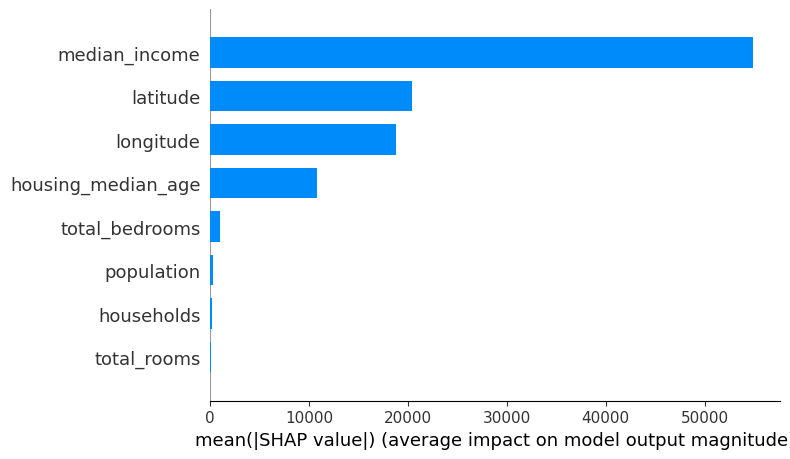

In [ ]:
# import shap library
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

- The above plot shows the SHAP feature importance measured as the mean absolute Shapley values.

- The variable `median_income` was the most important feature, changing the predicted `median_house_value` on average by 56000 on x-axis.

- SHAP is based on magnitude of feature attributions. The feature importance plot is useful, but contains no information beyond the importances. For a more informative plot, we will next look at the summary plot.

 # SHAP SUmmary plot

- The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value.

- The color represents the value of the feature from low to high. Overlapping points are jittered in y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.

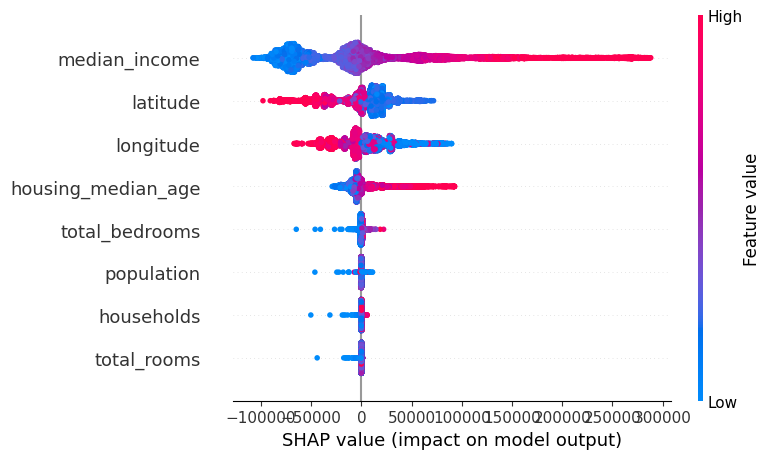

In [ ]:
shap.summary_plot(shap_values, X_train)

- This plot is made of all the dots in the train data. It demonstrates the following information:

- Feature importance: Variables are ranked in descending order.
- Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
- Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.
- Correlation: A high level of the median_income has a high and positive impact on the median_house_value. The “high” comes from the red color, and the “positive” impact is shown on the X-axis.

In [ ]:
# Let's write medium values for features
for i in range(8):
  print(shap_values[:, i].mean())

3472.1883214815366
-1453.940545875845
662.2561573372167
-11.391979659843047
226.01358622748776
-27.16684892854728
-8.270547202396902
-2438.14695098685
